In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 600)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn_clf = KNeighborsClassifier(n_neighbors = 4, weights="uniform")
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

(1437, 64) (1437,)
(360, 64) (360,)


0.9861111111111112

## Adjust parameter and measure performance

In [6]:
# Which k (number of neighbors) yield better performance
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(best_k, best_score)

5 0.9888888888888889


In [7]:
# Whether assigning weights to points
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors = k, weights = method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k

print(best_k, method, best_score)

5 distance 0.9888888888888889


In [8]:
# Which p for minkowski distance yields better performance
%time
best_score = 0.0
best_k = -1
best_p = -1

for p in range(1, 6):
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors = k, weights = "distance", p = p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p

print(best_k, best_p, best_score)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
5 2 0.9888888888888889


 ## Grid search: a more convenient to find optimal combination of parameters

In [12]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [18]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [19]:
knn_clf = grid_search.best_estimator_

In [15]:
grid_search.best_score_

0.990251161440186

In [16]:
grid_search.best_params_

{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}

In [20]:
knn_clf.score(X_test, y_test)

0.9805555555555555

In [24]:
%%time
# Set n_jobs to use parallel computing, set verbose to display more info while running
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.6s


CPU times: user 617 ms, sys: 156 ms, total: 773 ms
Wall time: 8.11 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.1s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1, p=3,
                                            weights='distance'),
             n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

# Scaling
## if the scales of features is not similar (Recall the time and size from the tumur example)
## Normalization (最值归一化) Standardization (均值方差归一化) 

## Normalization: the normalized are between 0 and 1
### This method is not suitable for data whose range is big (e.g., 1,1,1,100,100,100), it would be influenced by an outlier

In [31]:
x = np.random.randint(0, 100, size = 100)
X = np.random.randint(0, 100, (50, 2))

In [26]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.96969697, 0.81818182, 0.49494949, 0.19191919, 0.46464646,
       0.22222222, 0.45454545, 0.90909091, 0.05050505, 0.67676768,
       0.95959596, 0.31313131, 0.24242424, 0.74747475, 0.18181818,
       0.73737374, 0.91919192, 0.84848485, 0.21212121, 0.48484848,
       0.73737374, 0.49494949, 0.21212121, 0.06060606, 0.70707071,
       0.76767677, 0.57575758, 0.56565657, 0.48484848, 0.57575758,
       0.32323232, 0.93939394, 0.06060606, 0.75757576, 0.26262626,
       0.4040404 , 0.68686869, 0.87878788, 0.03030303, 0.18181818,
       0.21212121, 0.26262626, 0.3030303 , 0.02020202, 0.85858586,
       0.73737374, 0.71717172, 0.22222222, 0.37373737, 0.14141414,
       0.19191919, 0.44444444, 0.18181818, 0.8989899 , 1.        ,
       0.55555556, 0.01010101, 0.61616162, 0.98989899, 0.06060606,
       0.47474747, 0.52525253, 0.80808081, 0.04040404, 0.        ,
       0.1010101 , 0.83838384, 0.14141414, 0.26262626, 0.33333333,
       0.03030303, 0.64646465, 0.76767677, 0.61616162, 0.12121

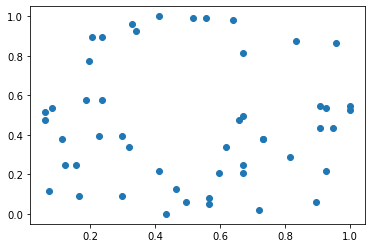

In [38]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))
# (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [40]:
np.mean(X[:, 0]), np.std(X[:, 0])

(0.5127835051546392, 0.29212071051565175)

## Standeralization: this approach convert the mean of original data to 0, and the standard deviation of it to 1

In [44]:
X2 = np.random.randint(0, 100, size = (50, 2))
X2 = np.array(X2, dtype = float)

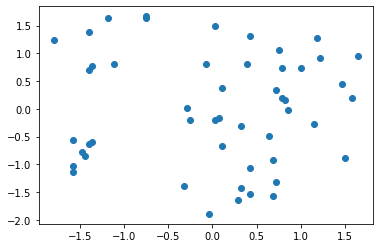

In [45]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [46]:
np.mean(X2[:, 0]), np.std(X2[:, 0])

(4.884981308350689e-17, 1.0)

## Use scaler in scikit-learn

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [50]:
X[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 600)

In [56]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
standardScaler.mean_, standardScaler.scale_

(array([5.85      , 3.06083333, 3.80083333, 1.21166667]),
 array([0.85800155, 0.42116818, 1.79863355, 0.78051087]))

In [60]:
X_train = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [63]:
# Apply KNN to standardlized data
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test_standard, y_test)

0.9

In [64]:
knn_clf.fit?

## Implement StandardScaler in preprocessing.py

In [65]:
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/preprocessing.py
standardScaler = StandardScalerImpl()
standardScaler.fit(X_train)
standardScaler.mean_, standardScaler.scale_

(array([-14.76473954, -24.52302534,  -3.2880581 ,  -3.54135836]),
 array([1.35838805, 5.63753029, 0.30911111, 1.64150453]))

In [66]:
standardScaler.transform(X_train)

array([[ 5.24474575e-01, -1.33161372e+00,  6.66709830e-01,
         8.81901018e-01],
       [-2.91374764e-01, -6.19309206e-01,  6.11112068e-01,
         1.01002223e+00],
       [-1.10722410e+00, -1.33161372e+00,  3.88721020e-01,
         6.25658592e-01],
       [-1.10722410e+00, -1.56904856e+00, -2.78452125e-01,
        -2.71189902e-01],
       [-5.24474575e-01,  8.05299830e-01, -1.16801632e+00,
        -1.29615961e+00],
       [ 5.24474575e-01,  5.67864991e-01,  1.22268745e+00,
         1.65062830e+00],
       [ 1.74824858e-01, -2.04391824e+00,  1.10732209e-01,
        -2.71189902e-01],
       [ 2.15617325e+00,  1.75503919e+00,  1.61187178e+00,
         1.26626466e+00],
       [ 1.10722410e+00, -1.44439527e-01,  9.44698640e-01,
         1.13814344e+00],
       [-8.74124291e-01,  1.51760435e+00, -1.27921184e+00,
        -1.03991718e+00],
       [ 1.80652353e+00, -6.19309206e-01,  1.27828521e+00,
         8.81901018e-01],
       [-1.22377401e+00, -1.44439527e-01, -1.33480960e+00,
      